In [1]:
!pip install opencv-python-headless numpy


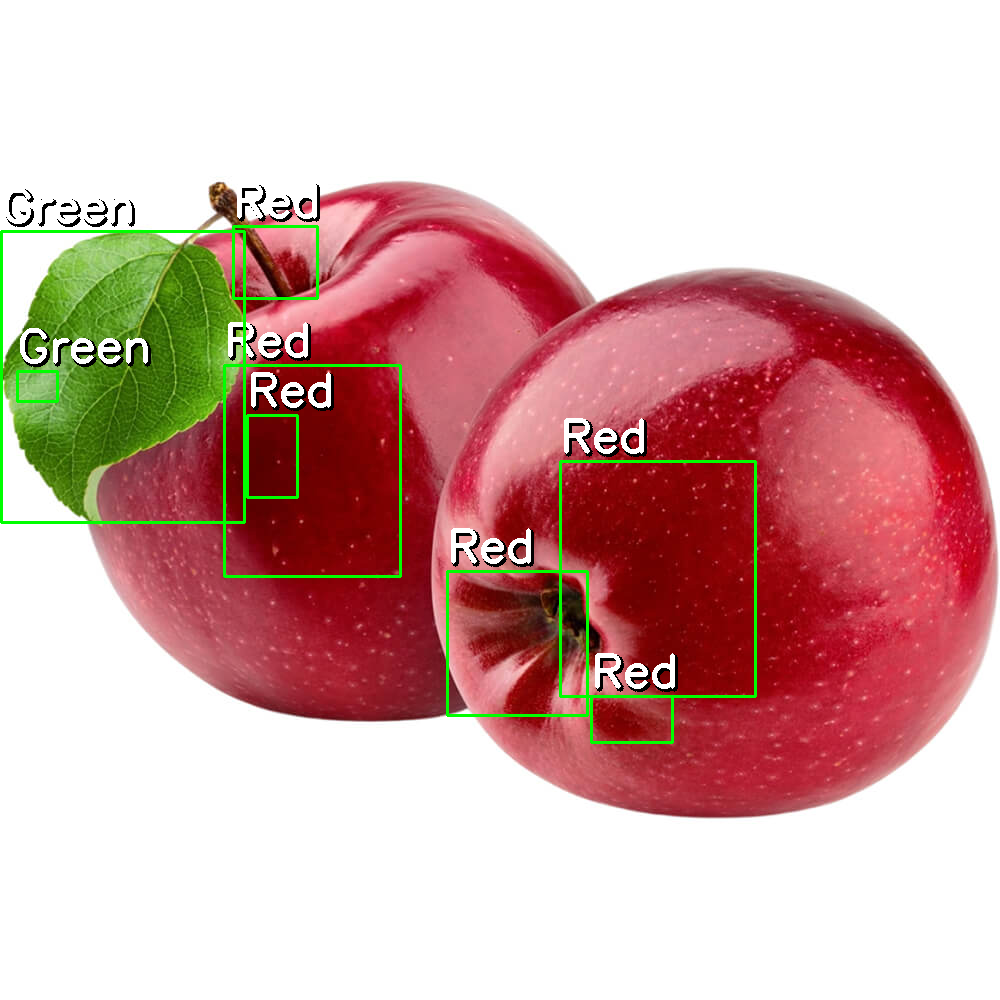

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = "apple.jpg"  # Change this to the name of the uploaded image in Google Colab
image = cv2.imread(image_path)

# Convert the image to HSV format
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for Red, Green, and Blue in HSV
colors = {
    "Red": ([0, 120, 70], [10, 255, 255]),  # Lower and upper HSV bounds for red
    "Green": ([36, 100, 100], [86, 255, 255]),  # Lower and upper HSV bounds for green
    "Blue": ([94, 80, 2], [126, 255, 255])  # Lower and upper HSV bounds for blue
}

# Process each color
for color_name, (lower, upper) in colors.items():
    lower = np.array(lower)  # Convert lower bound to numpy array
    upper = np.array(upper)  # Convert upper bound to numpy array

    # Create a mask for the color
    mask = cv2.inRange(hsv_image, lower, upper)

    # Find the contours of the detected color regions
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:  # Ignore small regions
            x, y, w, h = cv2.boundingRect(contour)  # Get bounding box of the contour
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

            # Improve text visibility with shadow effect
            cv2.putText(image, color_name, (x+2, y-8), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 5)  # Black shadow
            cv2.putText(image, color_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3)  # White text

# Display the image with detected color regions and labels
cv2_imshow(image)
